# Fetch Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
A = pd.read_csv("F:/DS_ML_AI_Course/START/01_24092021_BOXPLOT/Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [2]:
A.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

# Missing data treatment

In [12]:
null = pd.DataFrame(A.isna().sum(), columns=['ct'])
for i in null[null.ct > 0].index:
    if A[i].dtypes == "object":
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)

In [14]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# cat, con separation

In [15]:
cat = []
con = []

for i in A.columns:
    if A[i].dtypes == "object":
        cat.append(i)
    else:
        con.append(i)

In [16]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [17]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

# EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:xlabel='Price', ylabel='Density'>

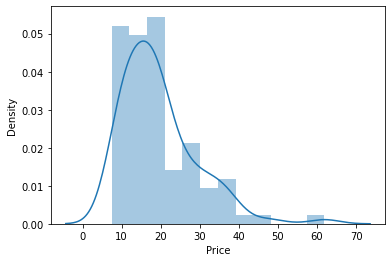

In [19]:
sb.distplot(A.Price)

<AxesSubplot:>

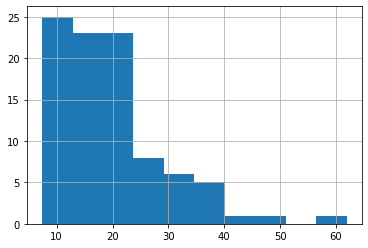

In [21]:
A.Price.hist()

Text(0, 0.5, 'Car Type')

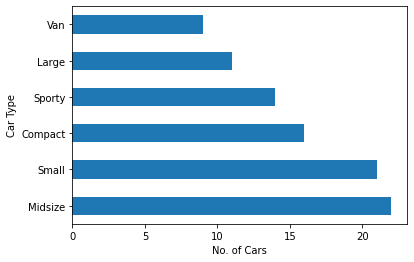

In [23]:
A.Type.value_counts().plot(kind = 'barh')
plt.xlabel('No. of Cars')
plt.ylabel('Car Type')

<AxesSubplot:ylabel='Type'>

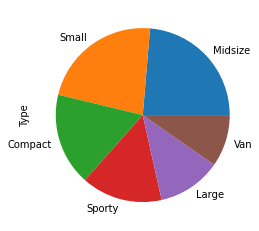

In [24]:
A.Type.value_counts().plot(kind = 'pie')

Text(0, 0.5, 'Manufacturer')

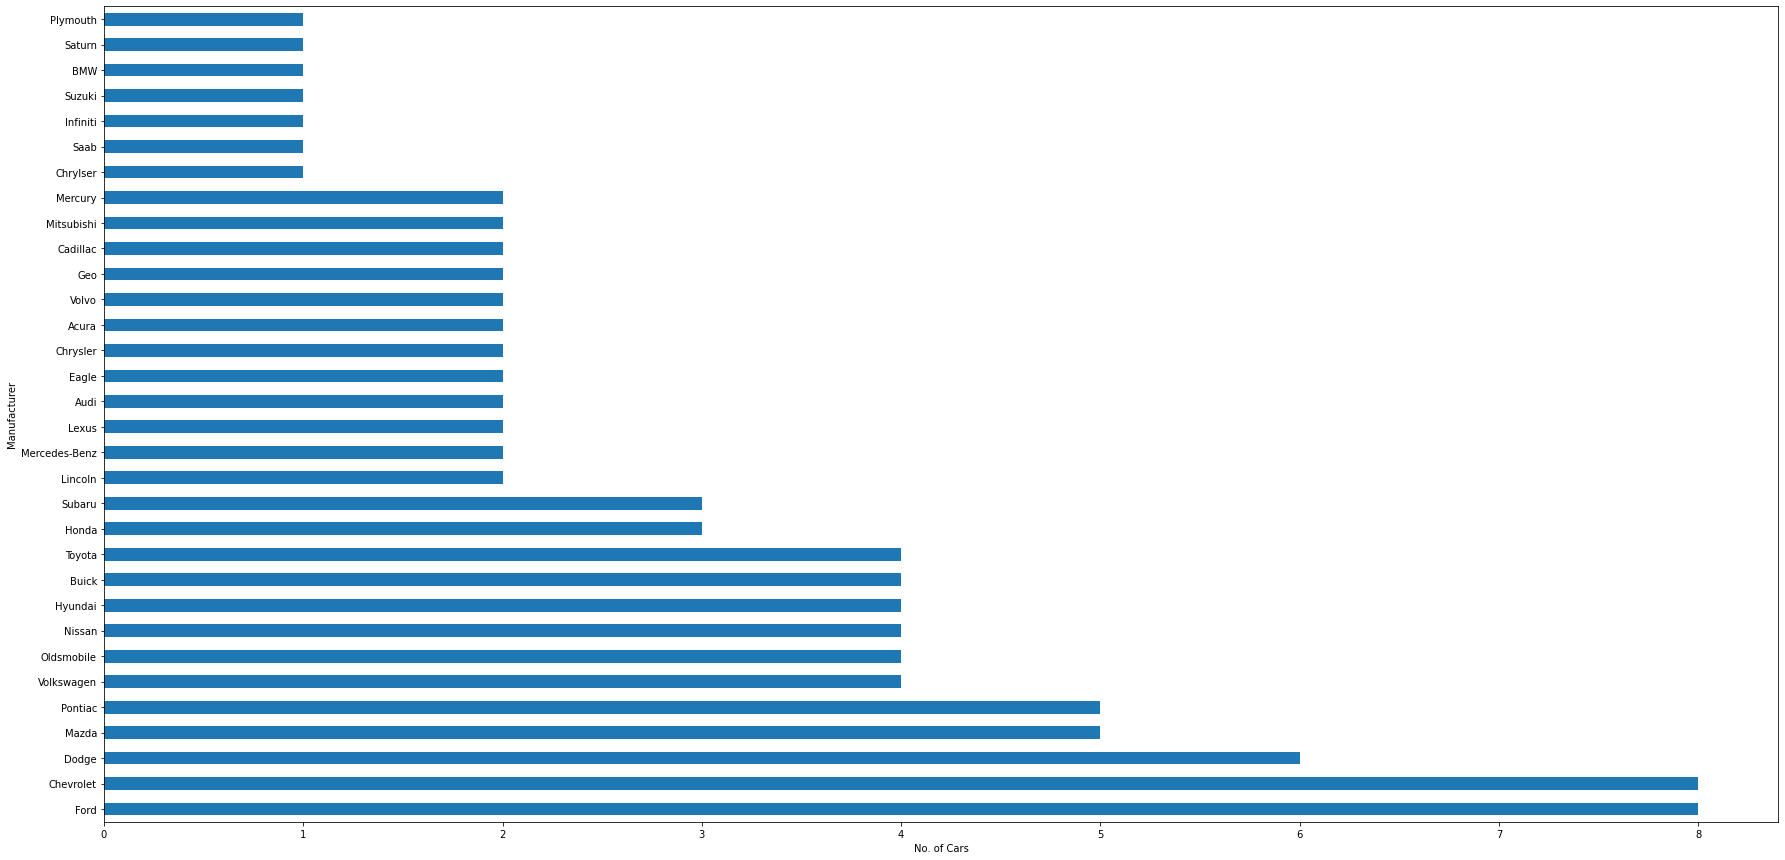

In [30]:
plt.figure(figsize=(30,15))
A.Manufacturer.value_counts().plot(kind = 'barh')
plt.xlabel('No. of Cars')
plt.ylabel('Manufacturer')

Text(0, 0.5, 'Drivetrain Type')

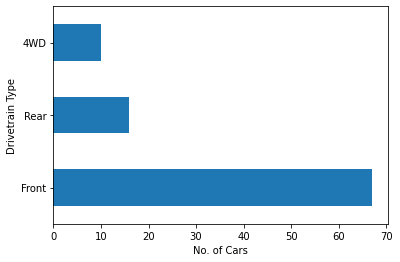

In [32]:
A.DriveTrain.value_counts().plot(kind = 'barh')
plt.xlabel('No. of Cars')
plt.ylabel('Drivetrain Type')

In [33]:
A.shape

(93, 28)

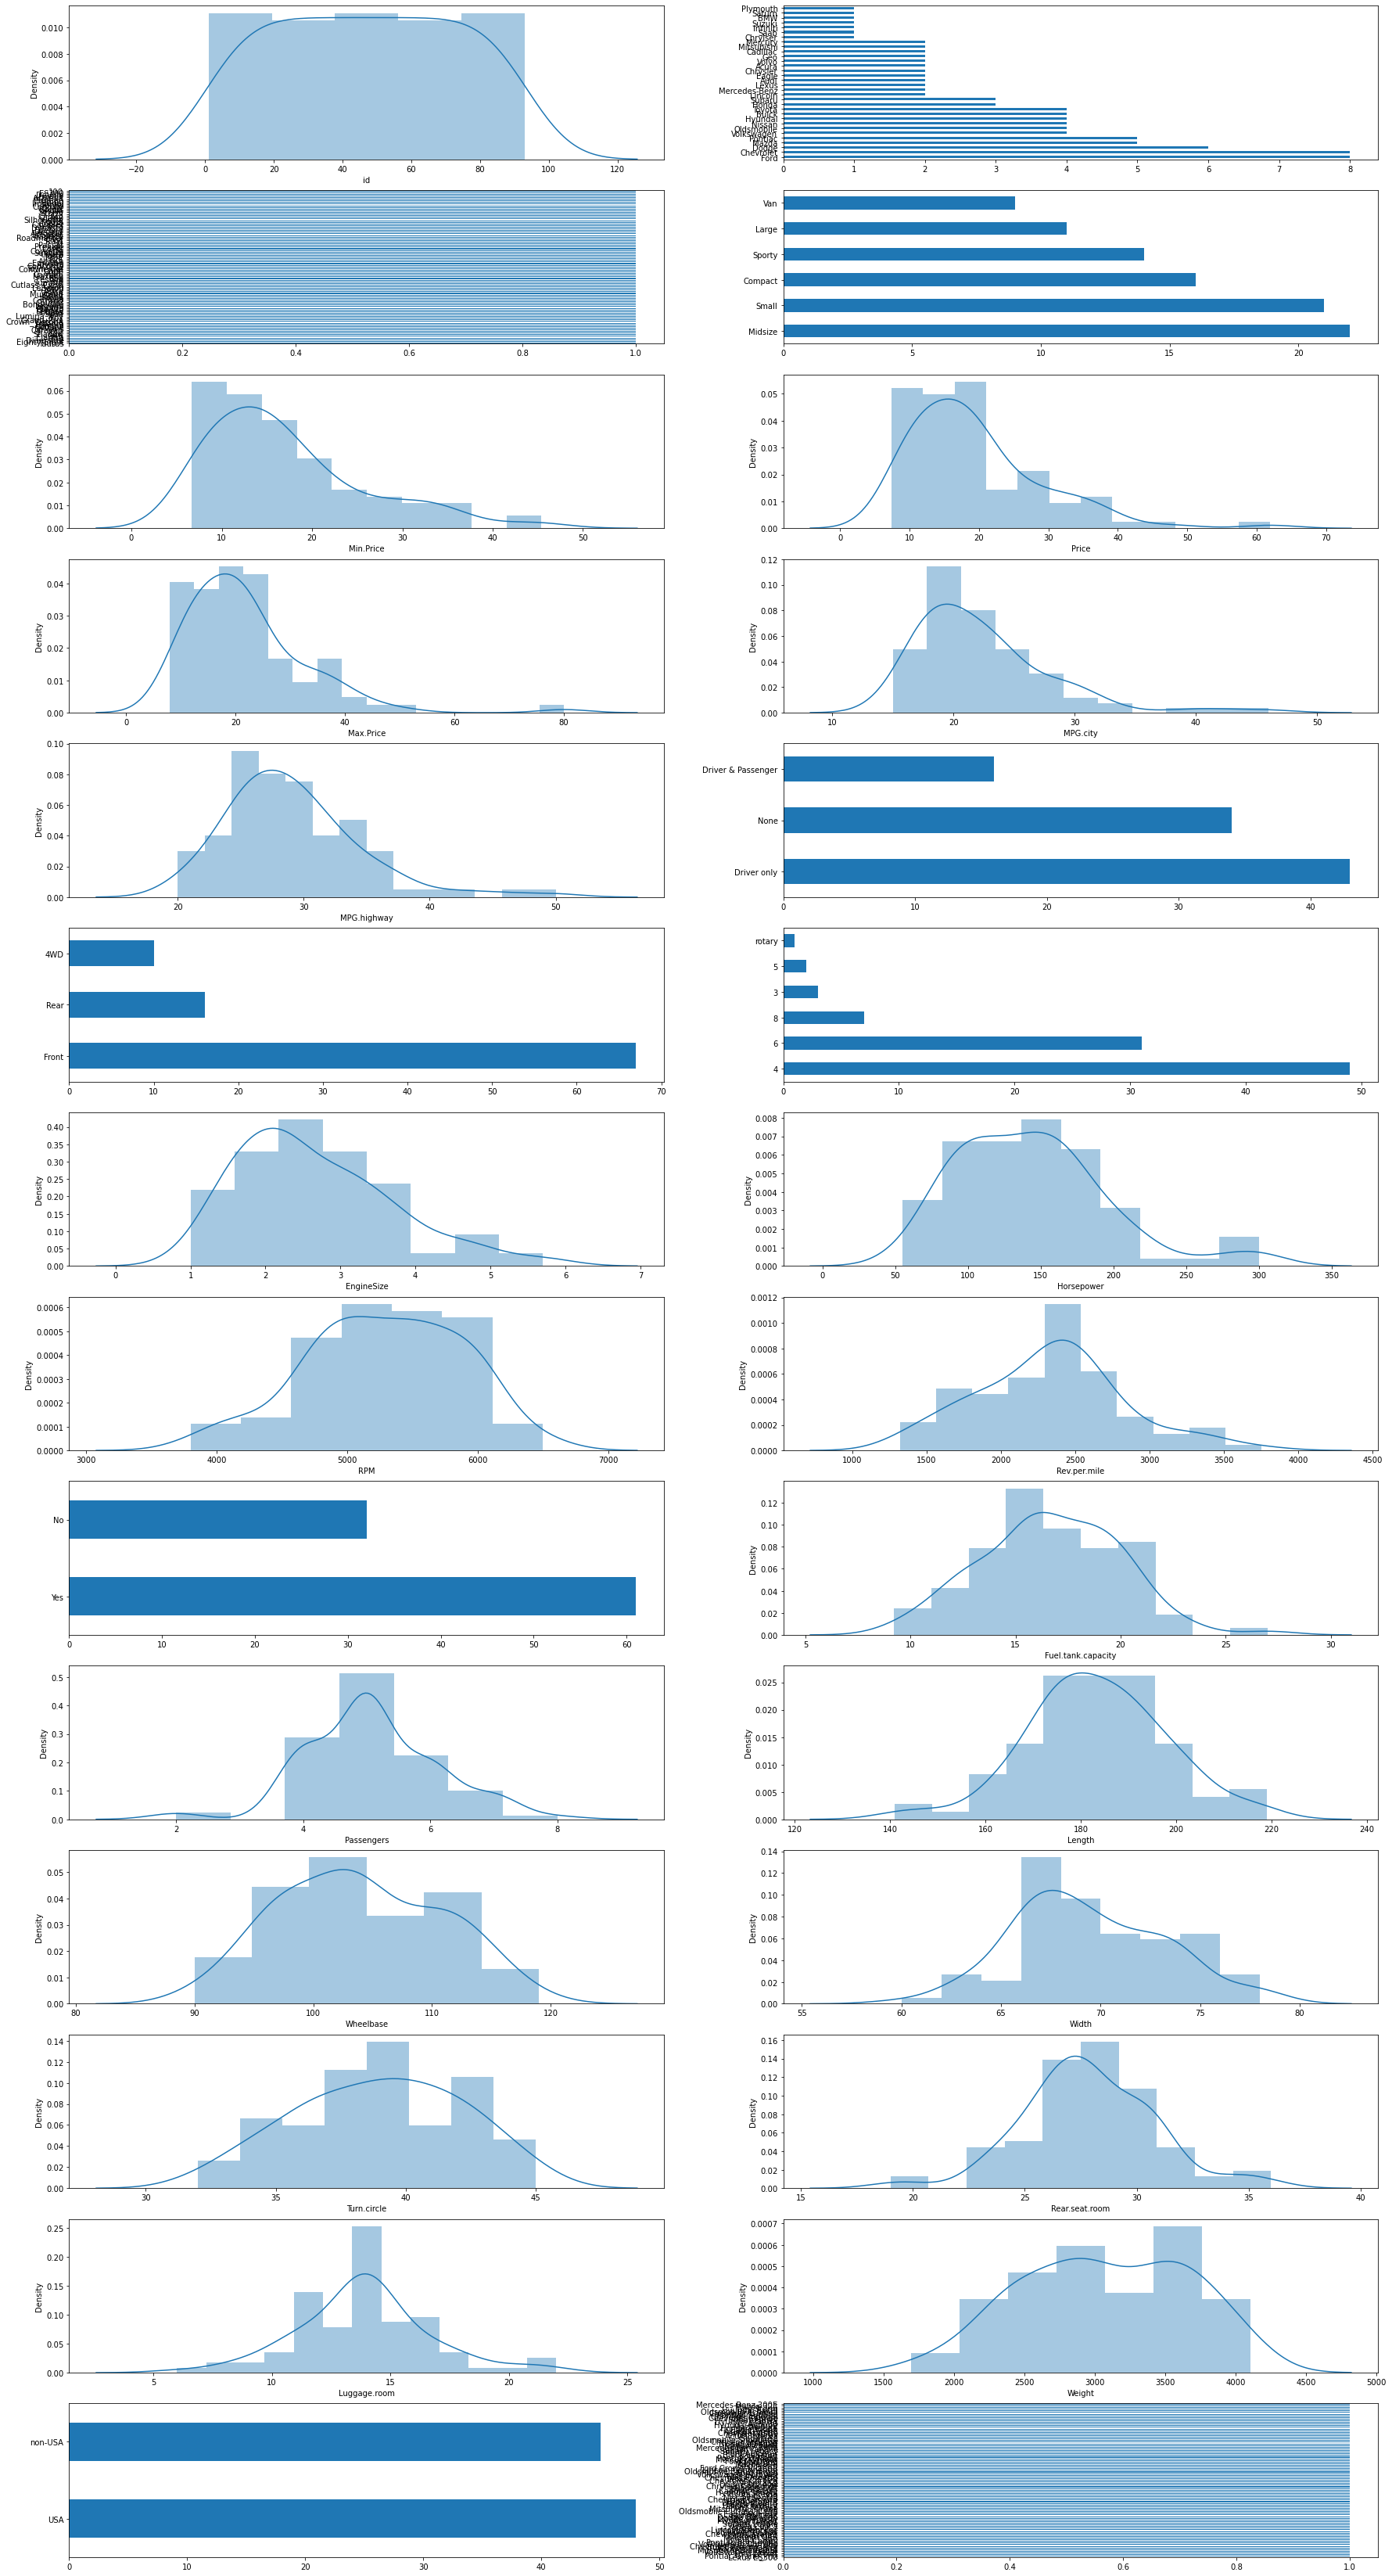

In [34]:
plt.figure(figsize = (30, 60))

x  = 1

for i in A.columns:
    if A[i].dtypes == "object":
        plt.subplot(14, 2, x)
        A[i].value_counts().plot(kind = "barh")
        x = x + 1
    else:
        plt.subplot(14, 2, x)
        sb.distplot(A[i])
        x = x + 1

In [35]:
len(con)

19

In [37]:
X = A.drop(["id"], axis=1)

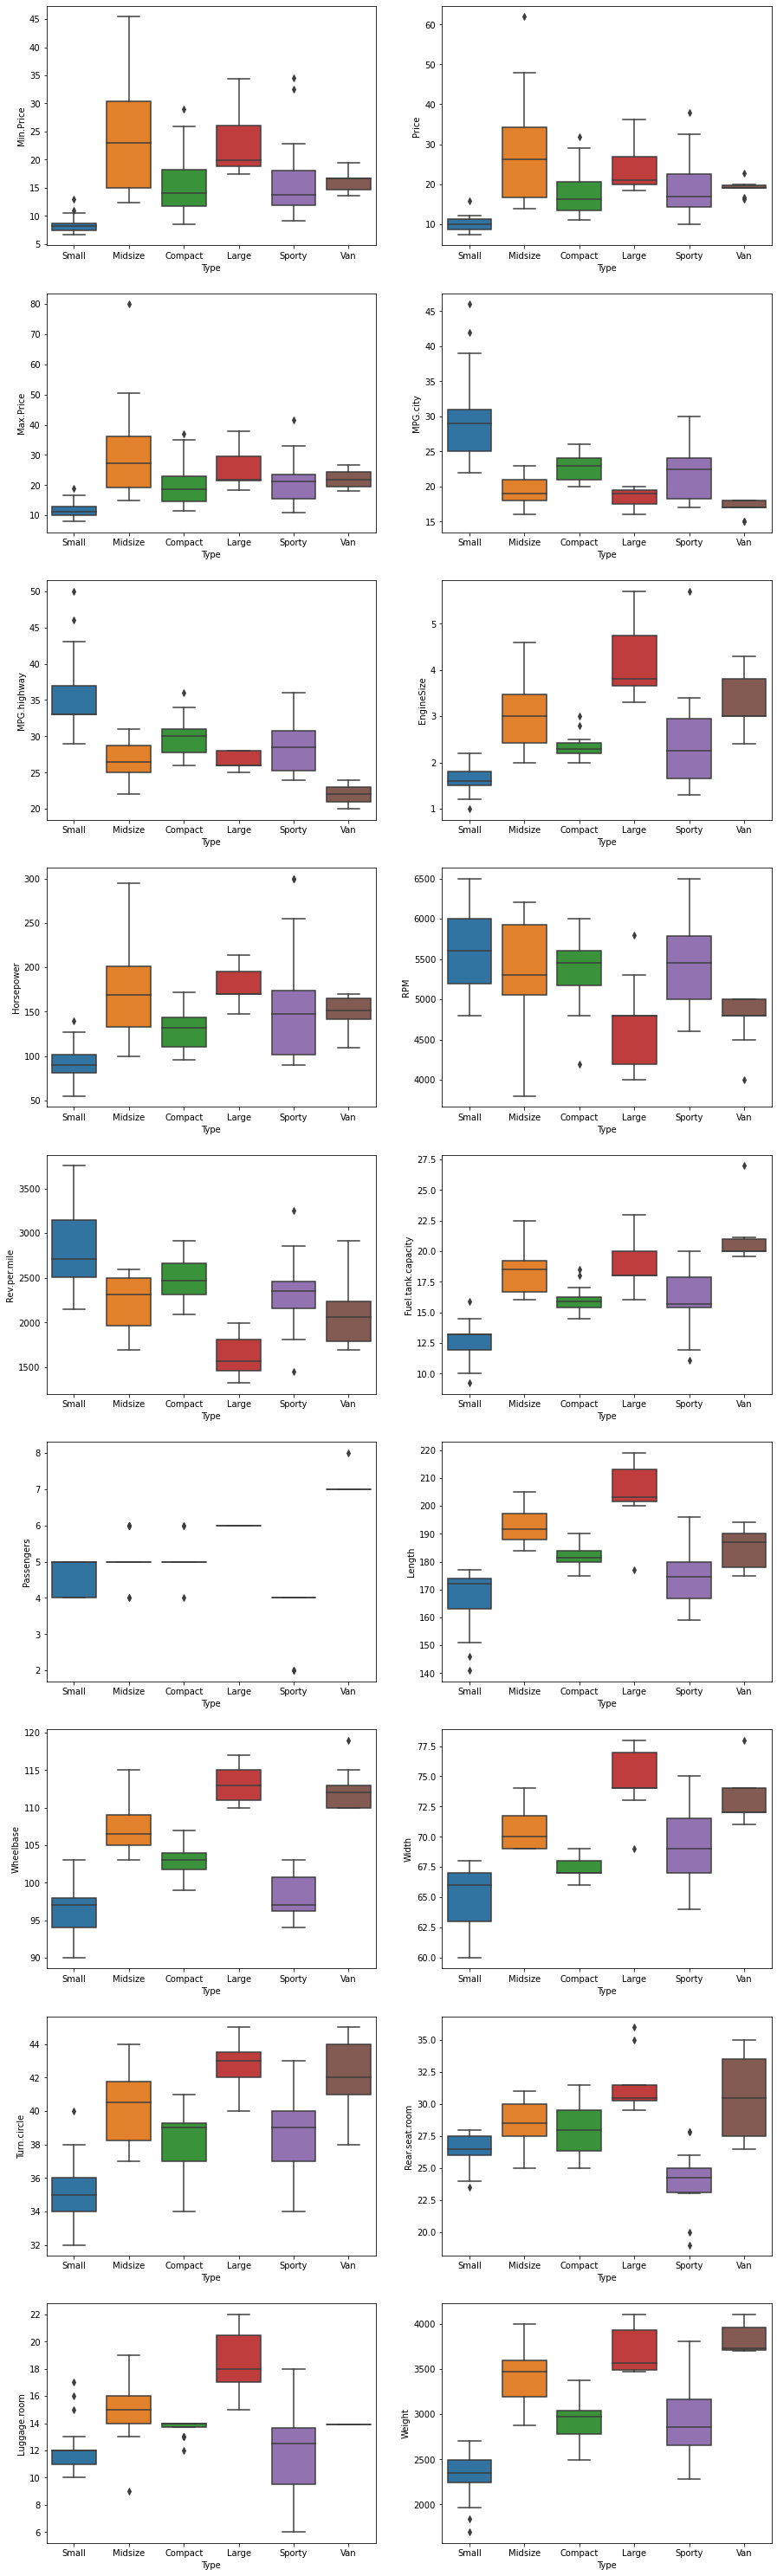

In [40]:
plt.figure(figsize = (15, 60))

x  = 1

for i in X.columns:
    if X[i].dtypes != "object":
        plt.subplot(10, 2, x)
        sb.boxplot(X.Type, X[i])
        x = x + 1

In [43]:
B = X.drop(["Manufacturer", "Model"], axis=1)

In [45]:
len(cat)

9

In [56]:
cat.remove("Make")

In [57]:
len(cat)

5

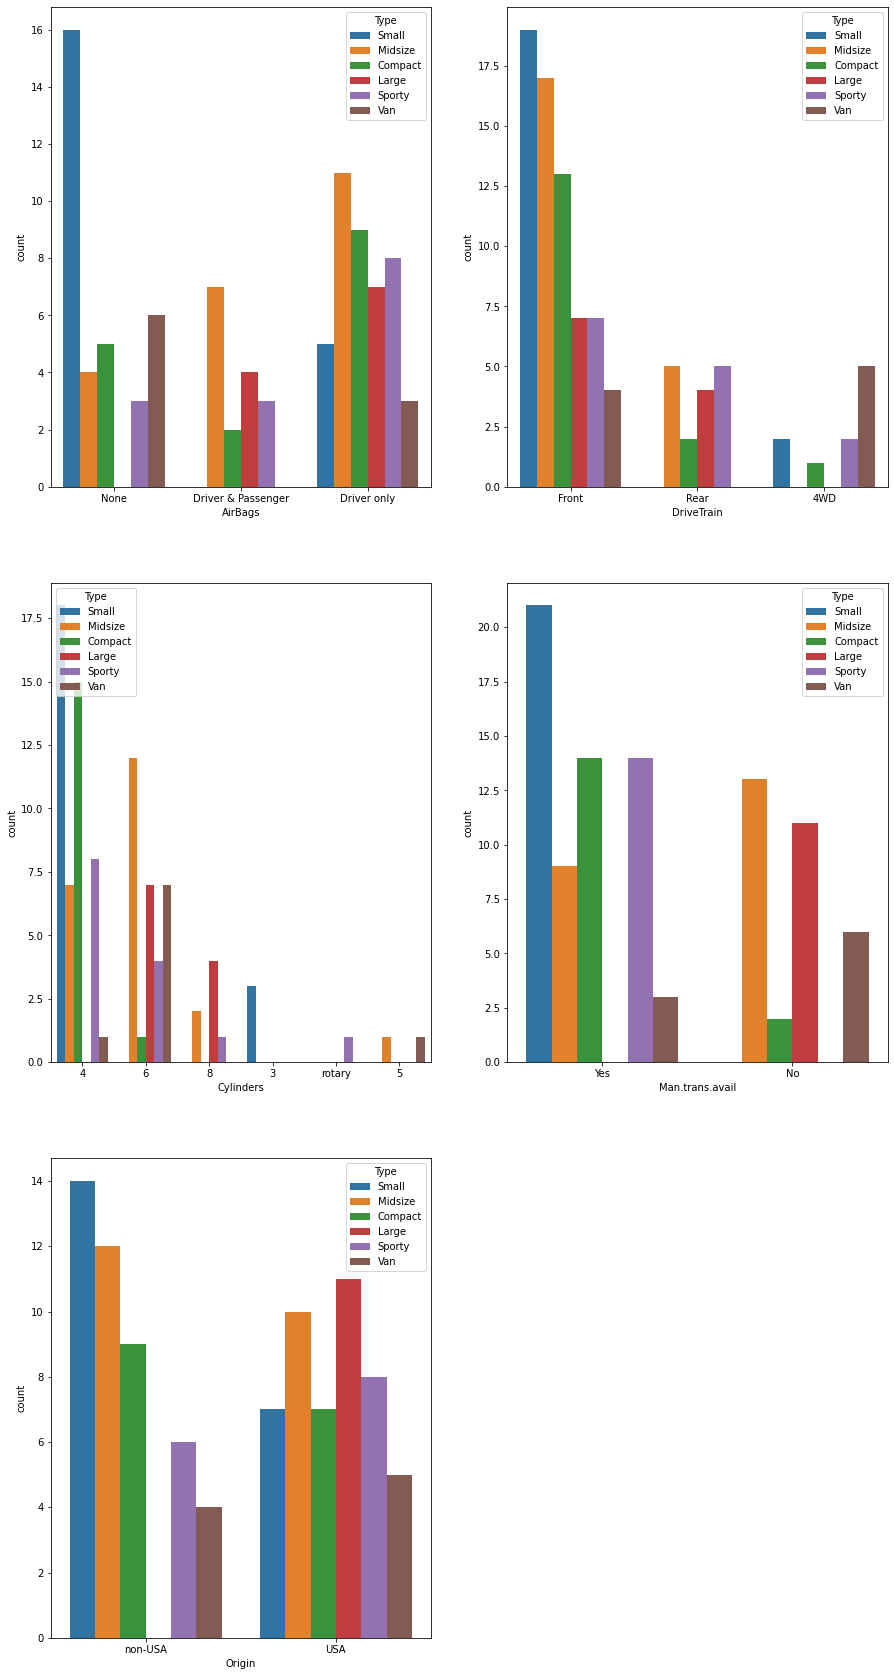

In [58]:
plt.figure(figsize = (15, 30))

x  = 1

for i in cat:
        plt.subplot(3, 2, x)
        sb.countplot(x=B[i],data = B, hue = "Type")
        x = x + 1